# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 11th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [2]:
import numpy as np # Useful for manipulating matrices
from skimage import io # Useful for image loading and saving
from matplotlib import pyplot as plt # Useful for plotting images on iPython or Jupyter Notebooks

from skimage import exposure # To get histogram of images
from skimage import img_as_float # Pass to float an image
from skimage.color import rgb2gray # Pass to gray an rgb image
from skimage.transform import rescale # To rescale images
from skimage.color import rgba2rgb # To convert RGBA image to RGB
from scipy import ndimage # To use the convolve function 
from skimage.transform import resize # To resize images

from skimage import filters # To use filters like Gaussian, Roberts, etc...
from skimage.util import random_noise # To add noise 
from skimage import feature # To apply Canny

from skimage.color.adapt_rgb import adapt_rgb, each_channel # To apply Gaussian on RGB images
%matplotlib inline

@adapt_rgb(each_channel) # Decorator from Scikit Image to process rgb images on filtering
def gaussian_each(image, sigma): # Pass each of the RGB channels to the filter one-by-one, and stitch the results back into an RGB image.
    return filters.gaussian(image, sigma)

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

In [5]:
#your solution
# We read the rocki image
rocki = io.imread('images_notebook/rocki.jpeg')
# We take each of its RGB channels separately
channel_red = rocki[:,:,0]
channel_green = rocki[:,:,1]
channel_blue = rocki[:,:,2]

# We plot the original image and each of its channels
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,4,1)
plt.imshow(rocki)
ax.title.set_text("Original Image")
print("Original photo shape ", rocki.shape, "dtype ", rocki.dtype)


ax = fig.add_subplot(1,4,2)
plt.imshow(channel_red,cmap="gray")
ax.title.set_text("Red Channel")
print("Red channel shape ", channel_red.shape, " Red channel dtype ", channel_red.dtype)

ax= fig.add_subplot(1,4,3)
plt.imshow(channel_green,cmap="gray")
ax.title.set_text("Green Channel")
print("Green channel shape ", channel_green.shape, " Green channel dtype ", channel_green.dtype)

ax= fig.add_subplot(1,4,4)
plt.imshow(channel_green,cmap="gray")
ax.title.set_text("Blue Channel")
print("Blue channel shape ", channel_green.shape, "Blue channel dtype ", channel_green.dtype)


# We pass the image into float using the img_as_float function
rocki_float = img_as_float(rocki)


FileNotFoundError: No such file: 'c:\Users\Maria\VA-3\p2\.ipynb_checkpoints\images_notebook\rocki.jpeg'

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

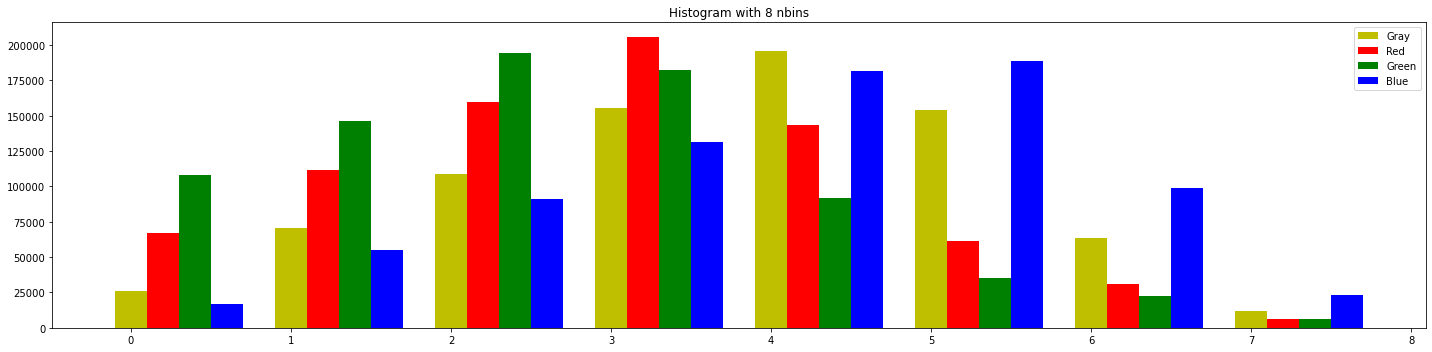

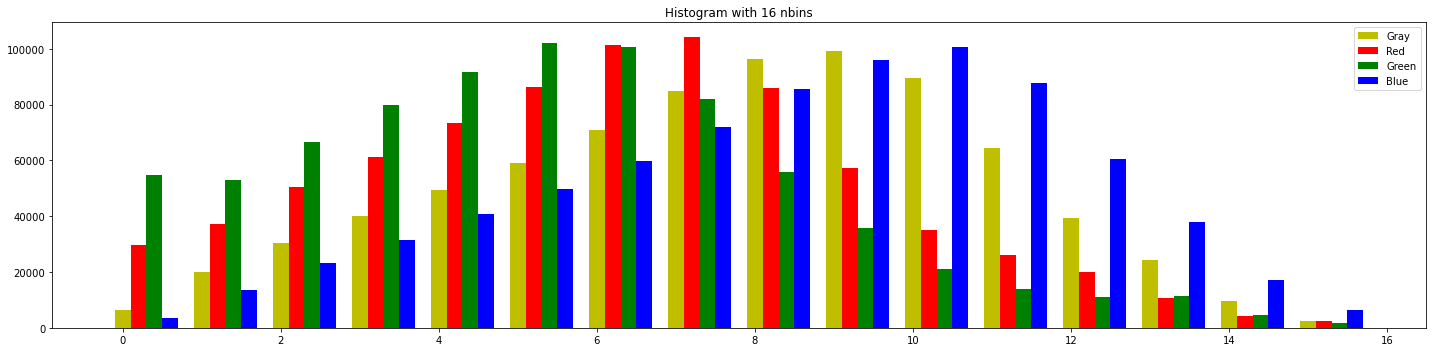

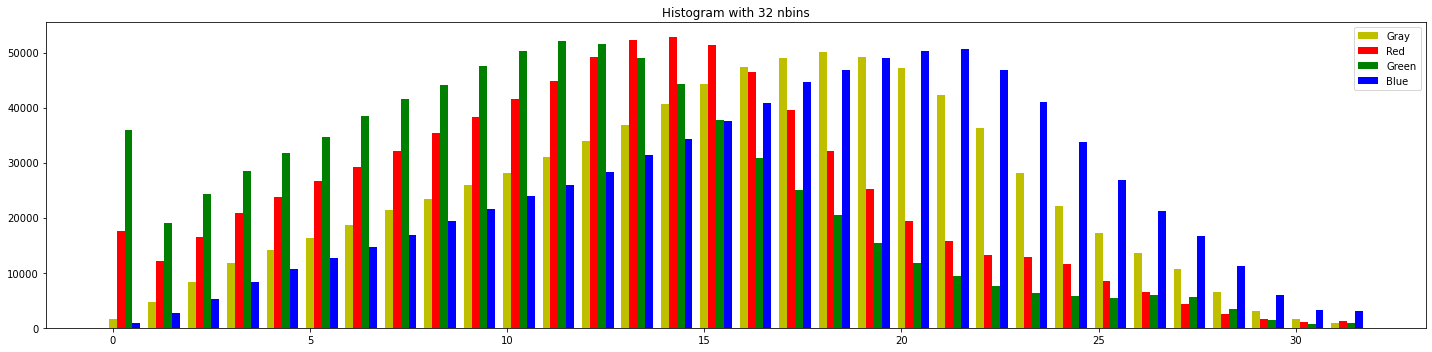

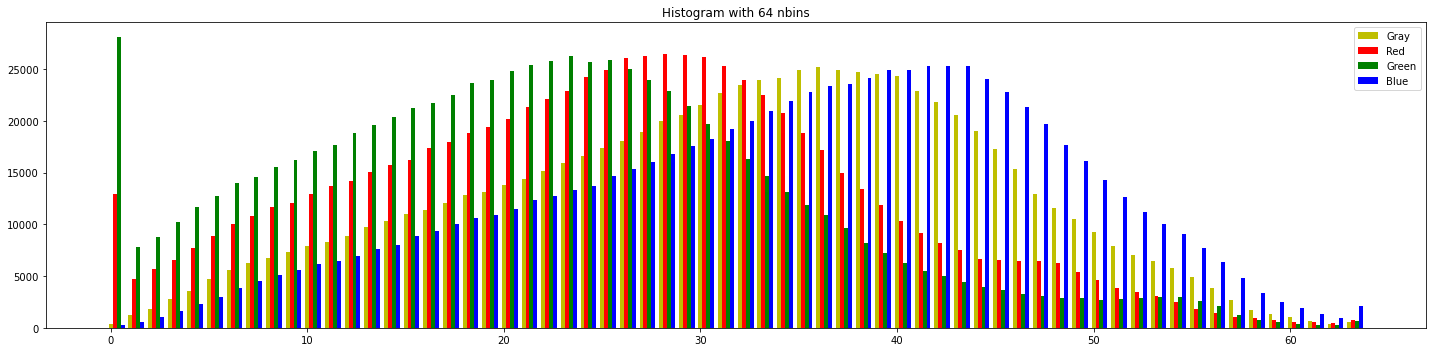

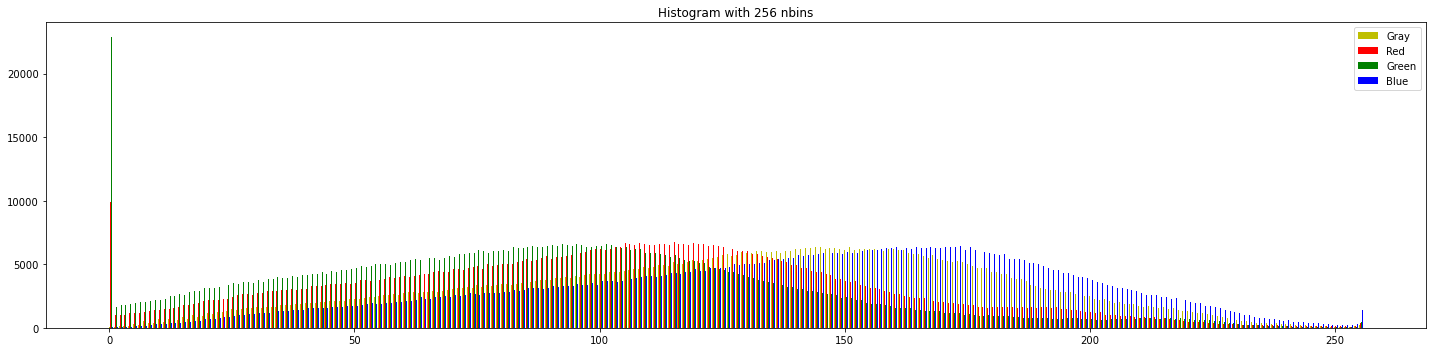

'\nQUESTION: What is the histogram representing for an image?\n\nThe histogram of an image is the representation of the levels of the frequenecy of a gray image .The left side of\nthe x axis represents the dark colour, and the right side of the x axis represents the white colour. The Y axis represents\nthe number of pixels with this frequenecy.\n\n'

In [ ]:
#your solution

def im_hist(im,  nbins=8) :
    
    # We get the grayscale image
    gray_image = rgb2gray(im)
    
    # We get each channel of the RGB image
    red_image = im[:,:,0]
    green_image = im[:,:,2]
    blue_image = im[:,:,1]    
    
    # We pass all of our images to float
    gray_image = img_as_float(gray_image)
    red_image = img_as_float(red_image)    
    green_image = img_as_float(green_image)
    blue_image = img_as_float(blue_image)    
    
    # For each channel, we create its histogram with
    # the exposure.histogram function
    histo_gray = exposure.histogram(gray_image, nbins)
    histo_r = exposure.histogram(red_image, nbins)
    histo_g = exposure.histogram(green_image, nbins)
    histo_b = exposure.histogram(blue_image, nbins)

    # We create the plot
    fig, ax = plt.subplots(ncols = 1, figsize = (20, 5))
    # and fix a width for all the bars
    width = 0.2
    
    bins_gray = np.arange(0,nbins) 
    bins_r = bins_gray  + width
    bins_g = bins_gray  + width * 2 
    bins_b = bins_gray  + width * 3 

    # We print each of the histograms
    ax.bar(bins_gray, histo_gray[0], width=0.2, color='y')
    ax.bar(bins_r, histo_r[0], width=0.2, color='r')
    ax.bar(bins_g, histo_g[0], width=0.2, color='g')
    ax.bar(bins_b, histo_b[0], width=0.2, color='b')
    
    # We set the title of the histogram
    ax.set_title('Histogram with ' + str(nbins) + ' nbins')
    
    # We set the legend of the histogram
    legend = ['Gray','Red', 'Green', 'Blue']
    ax.legend(legend)
    
    fig.tight_layout()
    
    plt.show()
    
# The histograms show us the frequencies 
# of certain values (inside the range of the image,
# in this case from 0 to 1 because we've converted 
# its values with the img_as_float function)
# in the pixels of an image.

# i.e., the first bar of the 8 bins histogram
# show us the frequency of the values between 0
# and 1/8 = 0.125. The second bar of the values
# between 0.125 and 0.250, etc.


im_hist(rocki, 8)
im_hist(rocki, 16)
im_hist(rocki, 32)
im_hist(rocki, 64)
im_hist(rocki, 256)



"""
QUESTION: What is the histogram representing for an image?

The histogram of an image is the representation of the levels of the frequenecy of a gray image .The left side of
the x axis represents the dark colour, and the right side of the x axis represents the white colour. The Y axis represents
the number of pixels with this frequenecy.

"""



### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


Original image minimum and maximum values: 0, 255
Grayscale image minimum and maximum values: 0.0, 1.0
Grayscale image after convolving it with the one-dimensional horizontal mask minimum and maximum values: 0.014051372549019607, 0.9989444444444446
Grayscale image after convolving it with the one-dimensional transposed minimum and maximum values: 0.024089385620915033, 0.9977959215686277
Grayscale image after convolving it with the two-dimensional mask minimum and maximum values: 0.05410400697167756, 0.9956720697167758


'\nQuestions\n\nIs the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.\n\nYes, with more size of the mask more is going to change the image and we smooth more the image\n\n\n'

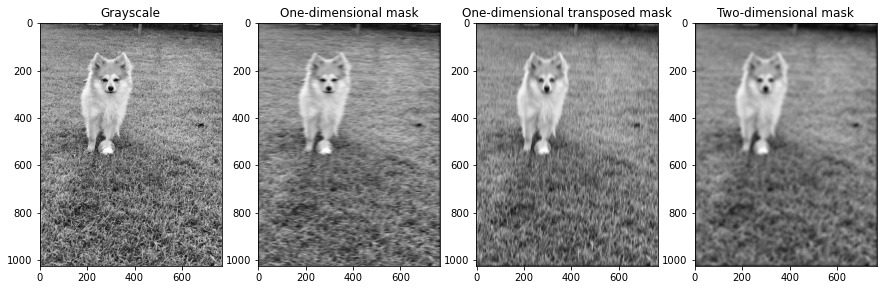

In [ ]:
from scipy import ndimage 

# We read the image
rocki = io.imread('images_notebook/rocki.jpeg')
# Wr convert it to grayscale with the function rgb2gray from the skimage.color package
rocki_grayscale = rgb2gray(rocki)

# We create a horizontal mask 
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# We normalize it dividing it by the sum of all its values
mask_h1d = mask_h1d / np.sum(mask_h1d)
# We apply it to the grayscale image with the ndimage.convolve function
# using standard parameters
rocki_convolve_h1d = ndimage.convolve(rocki_grayscale, mask_h1d, mode='constant', cval=0.0)

# Now, we transpose the horizontal mask (now it's vertical)
mask_h1d_transposed = mask_h1d.transpose()
# and we apply it, as before, to the grayscale image
rocki_convolve_h1d_transposed = ndimage.convolve(rocki_grayscale, mask_h1d_transposed, mode='constant', cval=0.0)

# We create a two-dimensional uniform mask by
# creating a np.zeros array of 15x15,
# putting all its values to
mask_h2d = np.zeros((15,15),dtype=np.uint8)
mask_h2d[:,:] = 1
# We normalize it dividing it by the sum of all its values 
mask_h2d = mask_h2d / np.sum(mask_h2d)
# We apply it to the grayscale image 
rocki_convolve_h2d = ndimage.convolve(rocki_grayscale, mask_h2d, mode='constant', cval=0.0)

# We plot the results
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.title('Grayscale')
plt.imshow(rocki_grayscale, cmap="gray")
fig.add_subplot(1,4,2)
plt.title('One-dimensional mask')
plt.imshow(rocki_convolve_h1d, cmap="gray")
fig.add_subplot(1,4,3)
plt.title('One-dimensional transposed mask')
plt.imshow(rocki_convolve_h1d_transposed, cmap="gray")
fig.add_subplot(1,4,4)
plt.title('Two-dimensional mask')
plt.imshow(rocki_convolve_h2d, cmap="gray")

print(f"Original image minimum and maximum values: {rocki.min()}, {rocki.max()}")
print(f"Grayscale image minimum and maximum values: {rocki_grayscale.min()}, {rocki_grayscale.max()}")
print(f"Grayscale image after convolving it with the one-dimensional horizontal mask minimum and maximum values: {rocki_convolve_h1d.min()}, {rocki_convolve_h1d.max()}")
print(f"Grayscale image after convolving it with the one-dimensional transposed minimum and maximum values: {rocki_convolve_h1d_transposed.min()}, {rocki_convolve_h1d_transposed.max()}")
print(f"Grayscale image after convolving it with the two-dimensional mask minimum and maximum values: {rocki_convolve_h2d.min()}, {rocki_convolve_h2d.max()}")


"""
Questions

Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Yes, with more size of the mask more is going to change the image and we smooth more the image


"""


b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


In [ ]:
# We use rgba2rgb to convert the RGBA image to RGB
face_3channels = rgba2rgb(rocki)

# We take each channel
face_red = face_3channels[:,:,0]
face_blue = face_3channels[:,:,1]
face_green = face_3channels[:,:,2]

# We convolve each channel separately by applying 
# a two-dimensional uniform mask 'mask_h2d', the one
# from the previous exercise, with ndimage.convolve
# function
face_red_convolve = ndimage.convolve(face_red, mask_h2d, mode='constant', cval=0.0)
face_blue_convolve = ndimage.convolve(face_blue, mask_h2d, mode='constant', cval=0.0)
face_green_convolve = ndimage.convolve(face_green, mask_h2d, mode='constant', cval=0.0)

# We change the three original color channels
# for the ones we've just convolved
face_3channels[:,:,0] = face_red_convolve 
face_3channels[:,:,1] = face_blue_convolve
face_3channels[:,:,2] = face_green_convolve

# We plot the red, blue and green 1 channel 
# convolutions and the 3 channel convolution
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,4,1)
plt.title('Red channel convolution')
plt.imshow(face_red_convolve, cmap="gray")
fig.add_subplot(1,4,2)
plt.title('Blue channel convolution')
plt.imshow(face_blue_convolve, cmap="gray")
fig.add_subplot(1,4,3)
plt.title('Green channel convolution')
plt.imshow(face_green_convolve, cmap="gray")
fig.add_subplot(1,4,4)
plt.title('3 channel filter')
plt.imshow(face_3channels, cmap="gray")

ValueError: the input array must have shape == (..., 4)), got (1024, 768, 3)

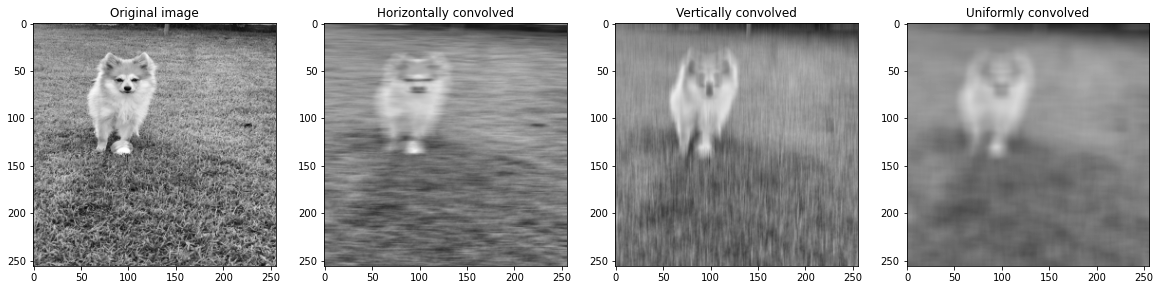

In [ ]:
#your solution


c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


(1024, 768, 3)
(256, 256, 3)


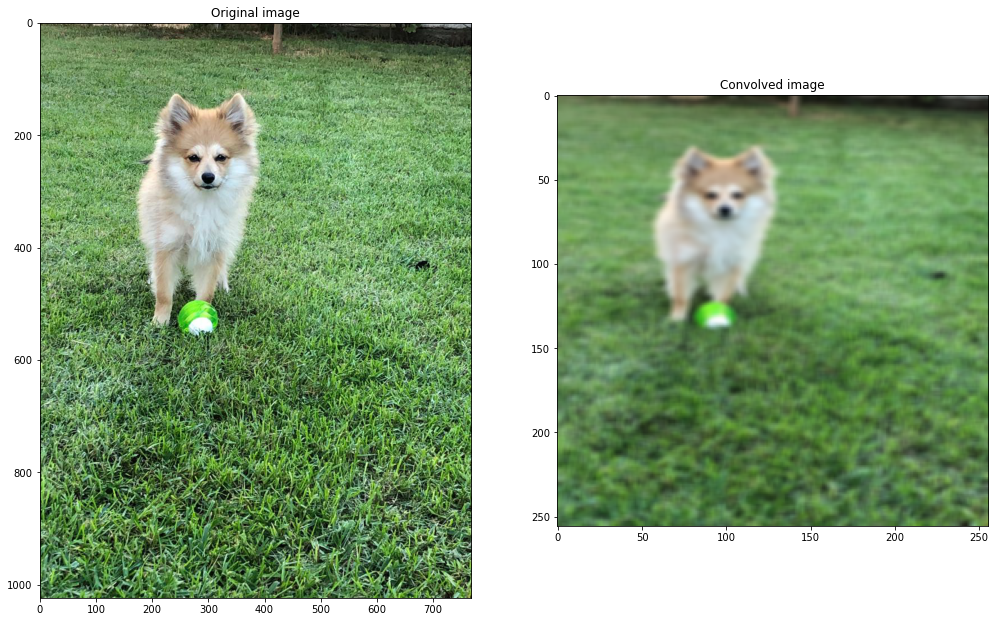

In [ ]:
from skimage import color
#your solution
def conv_coor(image, mask):
        #We have the mask 15*15

    #Create a copy of the original image and we convolve each of the channels wotheht implemented function convolve from
    #ndimage
    image_convolve = np.copy(image)
    image_convolve[:,:,0] = ndimage.convolve(image[:,:,0], mask) 
    image_convolve[:,:,1] = ndimage.convolve(image[:,:,1], mask) 
    image_convolve[:,:,2] = ndimage.convolve(image[:,:,2], mask) 

    
    #Return the image convolved
    img_reshape = resize(image_convolve,(256,256))
    print(img_reshape.shape)
    return img_reshape
    
#Read the image
face = io.imread('images_notebook/rocki.jpeg')

#Convert the image from rgba to rgb for doing a great convolve
print(face.shape)
#face_rgb = color.rgba2rgb(face)

fig = plt.figure(figsize=(17,17))

fig.add_subplot(1,2,1)
plt.imshow(face,cmap = 'gray')
plt.title('Original image')

mask = np.ones((15,15))
mask_sum = np.sum(mask)
mask = mask / mask_sum

fig.add_subplot(1,2,2)
plt.imshow(conv_coor(face,mask),cmap = 'gray')
plt.title('Convolved image')
plt.show()



### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


<BarContainer object of 32 artists>

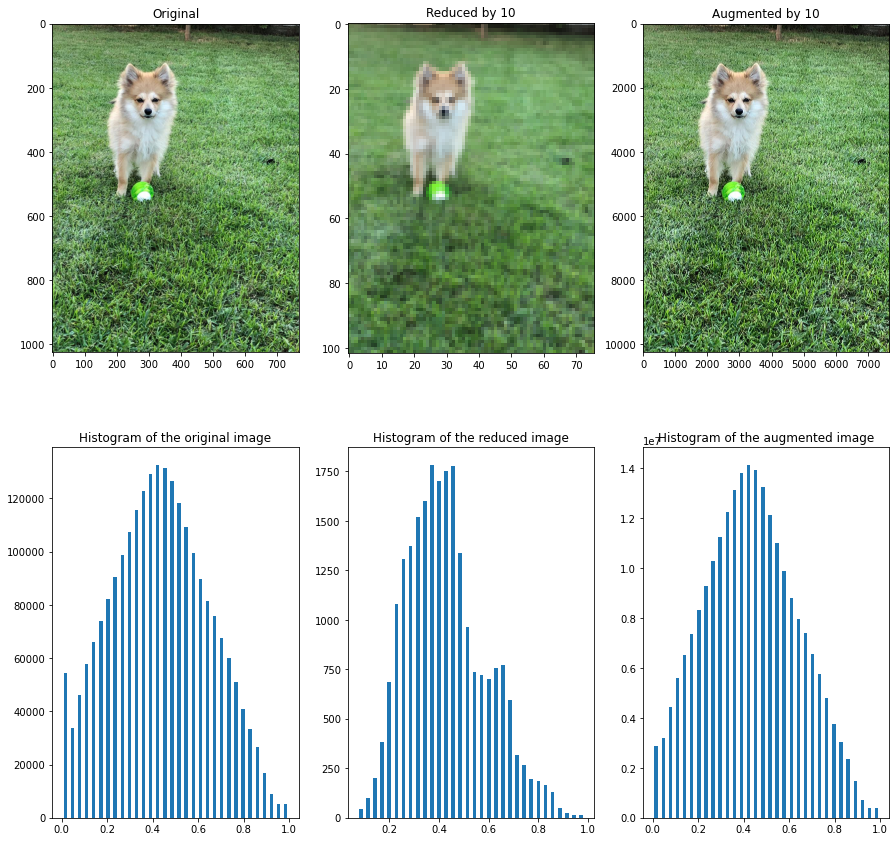

In [ ]:
#your solution
# We read one of Monroe's images with io.imread 
monroe = io.imread('images_notebook/rocki.jpeg')

# We reduce the image with the resize function from skimage.transform package
# giving it the image and both dimensions of the shape divided by 10 
# as parameters
monroe_reduced = resize(monroe, (monroe.shape[0]//10, monroe.shape[1]//10))

# We augment the image also with the resize function but multiplying 
# instead of dividing its shape
monroe_augmented = resize(monroe, (monroe.shape[0]*10, monroe.shape[1]*10))

# We plot the original, the reduced and the augmented images
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,3,1)
plt.title('Original')
plt.imshow(monroe, cmap = 'gray')
fig.add_subplot(2,3,2)
plt.title('Reduced by 10')
plt.imshow(monroe_reduced, cmap = 'gray')
fig.add_subplot(2,3,3)
plt.title('Augmented by 10')
plt.imshow(monroe_augmented, cmap = 'gray')


# We create each of their histograms with the exposure.histogram function
# making sure that the images have float values
# We give it i.e. 32 nbits
original_hst = exposure.histogram(img_as_float(monroe), nbins = 32)
reduced_hst = exposure.histogram(img_as_float(monroe_reduced), nbins = 32)
augmented_hst = exposure.histogram(img_as_float(monroe_augmented), nbins = 32)

# We plot them
fig.add_subplot(2,3,4)
plt.title('Histogram of the original image')
plt.bar(original_hst[1],original_hst[0], width=0.015)
fig.add_subplot(2,3,5)
plt.title('Histogram of the reduced image')
plt.bar(reduced_hst[1], reduced_hst[0], width=0.015)
fig.add_subplot(2,3,6)
plt.title('Histogram of the augmented image')
plt.bar(augmented_hst[1], augmented_hst[0], width=0.015)


b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


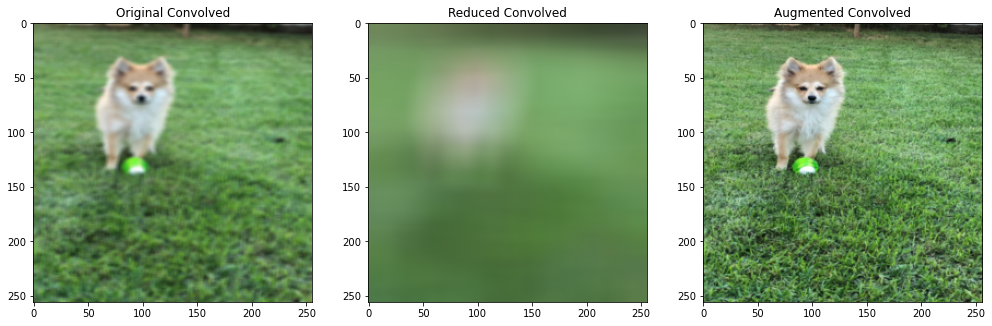

In [ ]:
#your solution

#We convolve each of the images and we show
mask = np.ones((15,15))
mask_sum = np.sum(mask)
mask = mask / mask_sum
face_convolve = conv_coor(rocki, mask)
face_reduce_convolve = conv_coor(monroe_reduced, mask)
face_augment_convolve = conv_coor(monroe_augmented, mask)

fig = plt.figure(figsize=(17,17))

fig.add_subplot(1,3,1)
plt.title('Original Convolved')
plt.imshow(face_convolve,cmap='gray')
fig.add_subplot(1,3,2)
plt.title('Reduced Convolved')
plt.imshow(face_reduce_convolve,cmap='gray')
fig.add_subplot(1,3,3)
plt.title('Augmented Convolved')
plt.imshow(face_augment_convolve,cmap='gray')
plt.show()

In [ ]:
numberOfBins = 32

hst_r, bins_r = histogram( img_as_float(face_convolve[:,:,0]), nbins=numberOfBins)
hst_g, bins_g = histogram( img_as_float(face_convolve[:,:,1]), nbins=numberOfBins)
hst_b, bins_b = histogram( img_as_float(face_convolve[:,:,2]), nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,4))
cl_r = plt.bar( ind, hst_r, 0.1, color='r')
cl_g = plt.bar( ind+.1, hst_g,0.1, color='g')
cl_b = plt.bar( ind+.2, hst_b,0.1, color='b')
plt.legend((cl_r[0], cl_g[0], cl_b[0]), ('Red','Green','Blue'), loc=2, prop={'size': 20})
plt.show()

numberOfBins = 32

hst_r, bins_r = histogram( img_as_float(face_reduce_convolve[:,:,0]), nbins=numberOfBins)
hst_g, bins_g = histogram( img_as_float(face_reduce_convolve[:,:,1]), nbins=numberOfBins)
hst_b, bins_b = histogram( img_as_float(face_reduce_convolve[:,:,2]), nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,4))
cl_r = plt.bar( ind, hst_r, 0.1, color='r')
cl_g = plt.bar( ind+.1, hst_g,0.1, color='g')
cl_b = plt.bar( ind+.2, hst_b,0.1, color='b')
plt.legend((cl_r[0], cl_g[0], cl_b[0]), ('Red','Green','Blue'), loc=2, prop={'size': 20})
plt.show()

numberOfBins = 32

hst_r, bins_r = histogram( img_as_float(face_augment_convolve[:,:,0]), nbins=numberOfBins)
hst_g, bins_g = histogram( img_as_float(face_augment_convolve[:,:,1]), nbins=numberOfBins)
hst_b, bins_b = histogram( img_as_float(face_augment_convolve[:,:,2]), nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,4))
cl_r = plt.bar( ind, hst_r, 0.1, color='r')
cl_g = plt.bar( ind+.1, hst_g,0.1, color='g')
cl_b = plt.bar( ind+.2, hst_b,0.1, color='b')
plt.legend((cl_r[0], cl_g[0], cl_b[0]), ('Red','Green','Blue'), loc=2, prop={'size': 20})
plt.show()


NameError: name 'histogram' is not defined

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

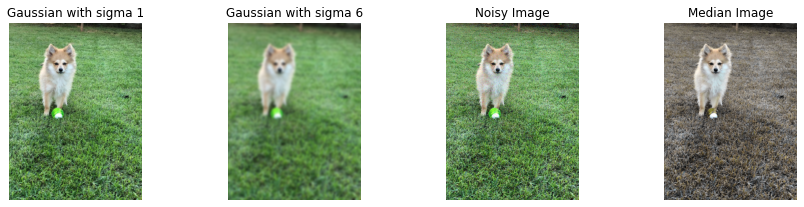

In [ ]:
#your solution
# We read the original image again (to make sure 
# that's the original and no changes have been made
# when doing previous exercises)
original_face = io.imread('images_notebook/rocki.jpeg')

# We apply a Gaussian filter function from sckit-image with sigma 1
face_gaussian = np.copy(original_face)
face_gaussian = gaussian_each(face_gaussian, 1)


# We apply another Gaussian filter but now with sigma 6
face_gaussian_diff = np.copy(original_face)
face_gaussian_diff = gaussian_each(face_gaussian_diff, 6)

# We create a noisy image from the original one
noisy = random_noise(original_face, mode='s&p')
median = np.copy(noisy)
filters.median(noisy, out=median)

# We plot them
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(4 ,4, 1)
ax.title.set_text('Gaussian with sigma 1')
plt.axis('off')
plt.imshow(face_gaussian, cmap='gray')

ax = fig.add_subplot(4 ,4, 2)
ax.title.set_text('Gaussian with sigma 6')
plt.axis('off')
plt.imshow(face_gaussian_diff)

ax = fig.add_subplot(4, 4, 3)
ax.title.set_text('Noisy Image')
plt.axis('off')
plt.imshow(noisy)

ax = fig.add_subplot(4, 4, 4)
ax.title.set_text('Median Image')
plt.axis('off')
plt.imshow(median)

plt.show()

b) **(Optional)** Apply the smoothing on some other images and present their results.

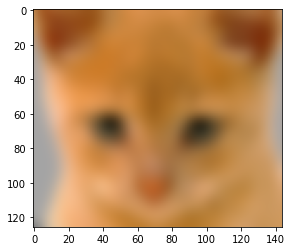

In [ ]:
#your solution
panda = io.imread('images_notebook/cat.jpg')
                                             
'''
The multichannel has to be true because if not, 
it will treat the third channel as one more value to multiply and we will get it wrong
'''
res = rescale(panda, .5, multichannel=True)  
# res = rescale(panda, .5) 
# in some versions

# We apply the gaussian filter
res = gaussian_each(res, 4)

# We visualize it
plt.imshow(res);

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""

# Function that will show n images with their titles
# Useful to print different results
def show_images_edges(images, titles):
    
    # Struct of plots
    fig = plt.figure(figsize=(20,20))
    
    for i in range(len(images)):        
        ax = fig.add_subplot(1 ,len(images), i+1)
        ax.title.set_text(titles[i])
        plt.axis('off')
        plt.imshow(images[i], cmap='gray')
    
    plt.show()


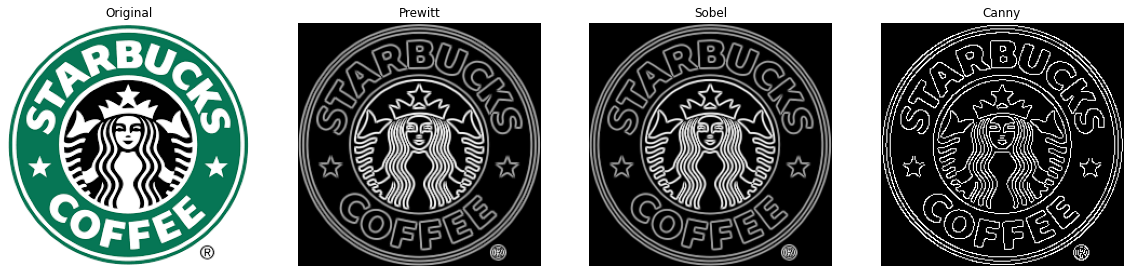

In [ ]:
# We get the logo image
original_logo = io.imread('images_notebook/logo.png')

# We convert it to gray, as these tecniques use 2-D images
logo = rgb2gray(original_logo)

# We call each flter and get their results
logo_prewitt = filters.prewitt(logo)
logo_sobel = filters.sobel(logo)
# Canny needs a sigma value because it uses a Gaussian filter internally
logo_canny = feature.canny(logo, sigma=.5)

# We put all the results in an array and call our 'show_images_edges' function to display them
titles = ['Original', 'Prewitt', 'Sobel', 'Canny']
logos = [original_logo,  logo_prewitt, logo_sobel, logo_canny]

show_images_edges(logos, titles)

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

<IPython.core.display.Javascript object>


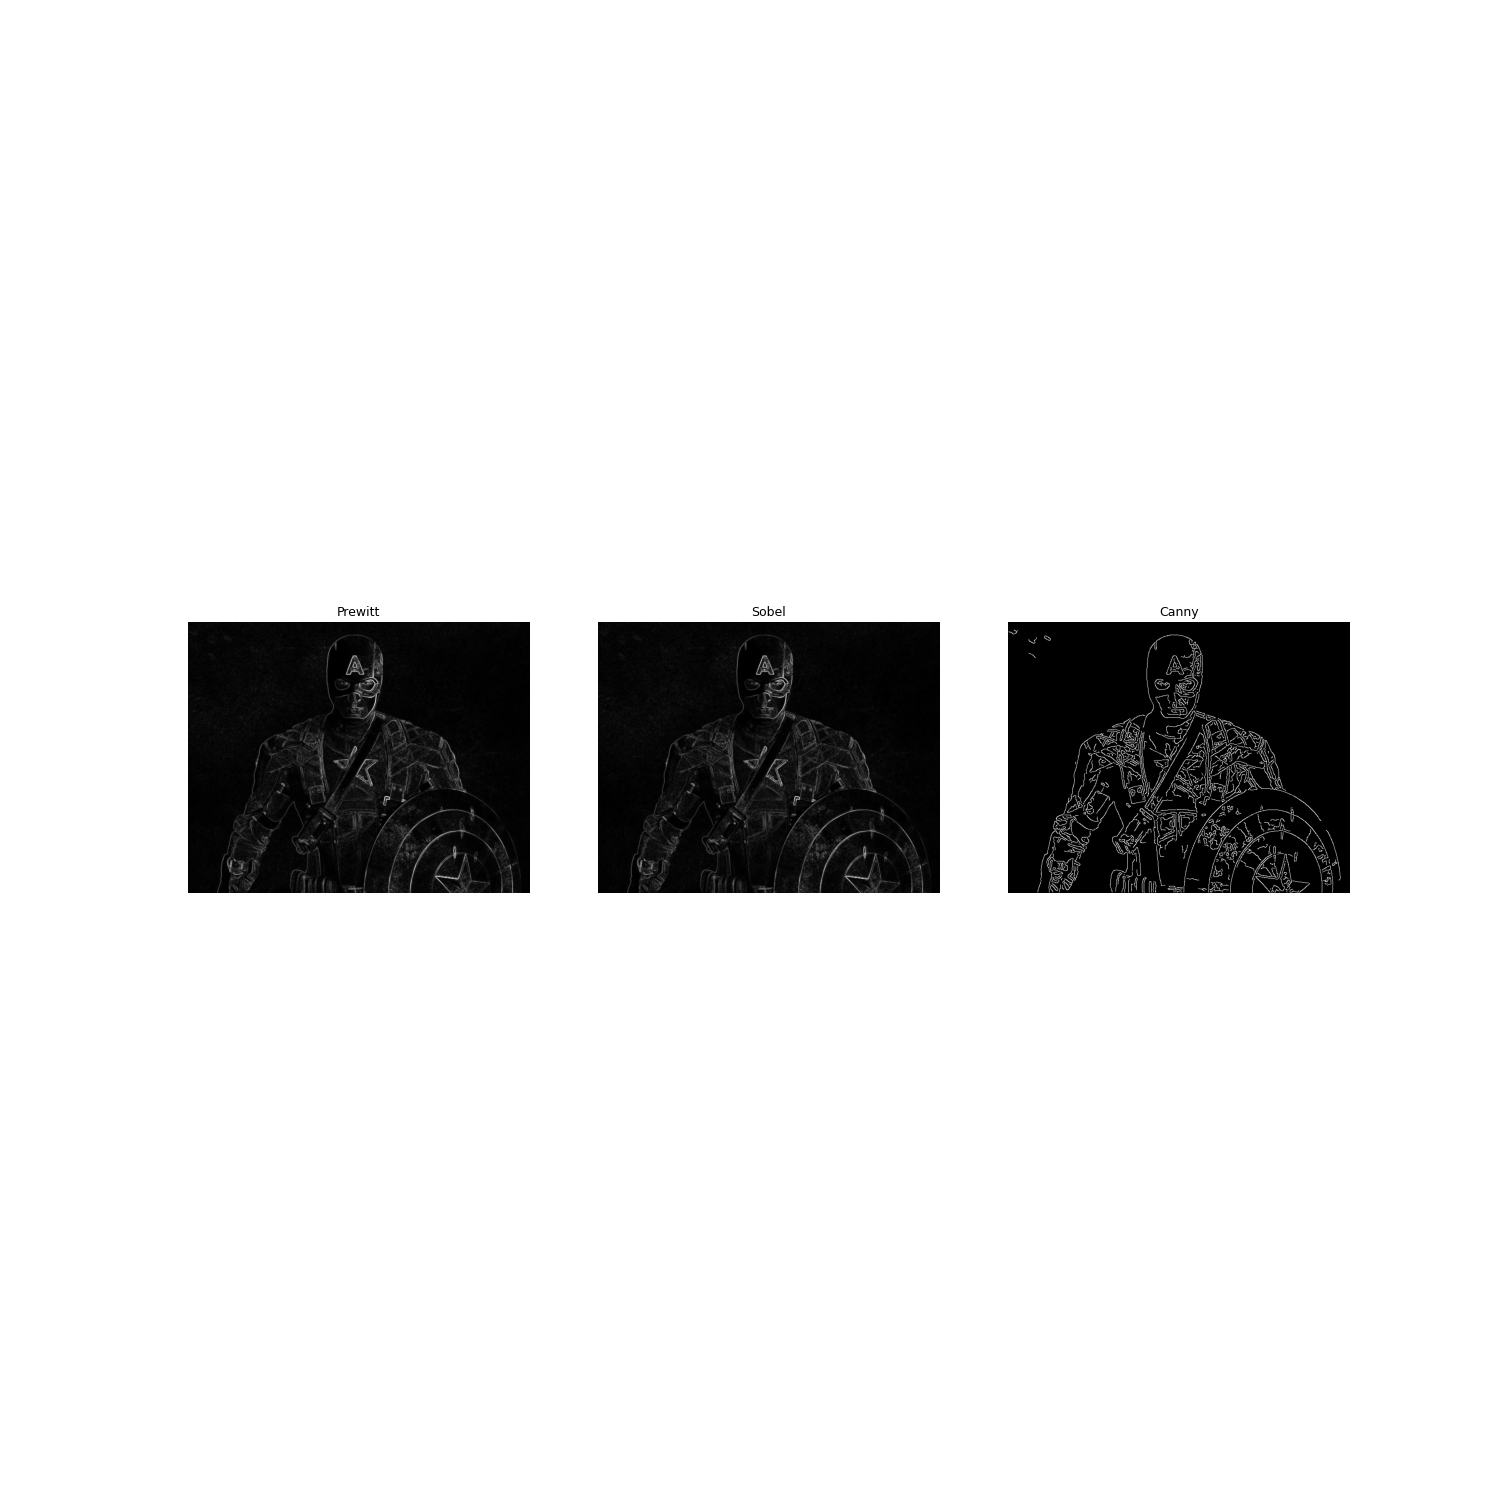

In [ ]:
#your solution
# We read the pikachu RGB image
pikachu = io.imread('images_notebook/Capitain_America.jpg')

# We convert it to gray, as these tecniques use 2-D images
pikachu_2d = rgb2gray(pikachu)

# We call each flter and get their results
res_prewitt = filters.prewitt(pikachu_2d)
res_sobel = filters.sobel(pikachu_2d)
res_canny = feature.canny(pikachu_2d, sigma=1.5)

# We put all the results in an array and call our 'show_images_edges' function to display them
titles = ['Prewitt', 'Sobel', 'Canny']
imgs = [ res_prewitt,res_sobel,res_canny]
show_images_edges(imgs, titles)

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


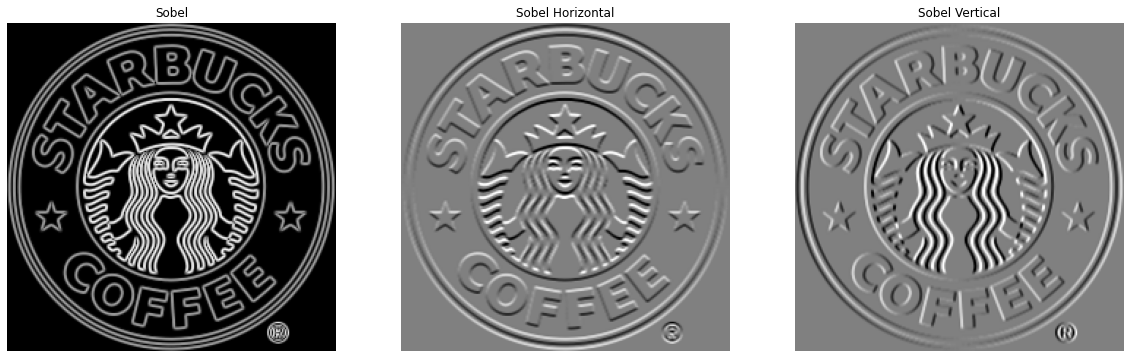

In [ ]:
#your solution
# We try the three different Sobel types
res_sobel = filters.sobel(pikachu_2d)
res_sobel_h = filters.sobel_h(pikachu_2d)
res_sobel_v = filters.sobel_v(pikachu_2d)

# We put all results in an array and call a out function to display them
imgs = [res_sobel, res_sobel_h, res_sobel_v]
titles = ['Sobel', 'Sobel Horizontal', 'Sobel Vertical']

show_images_edges(imgs, titles)

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

<IPython.core.display.Javascript object>


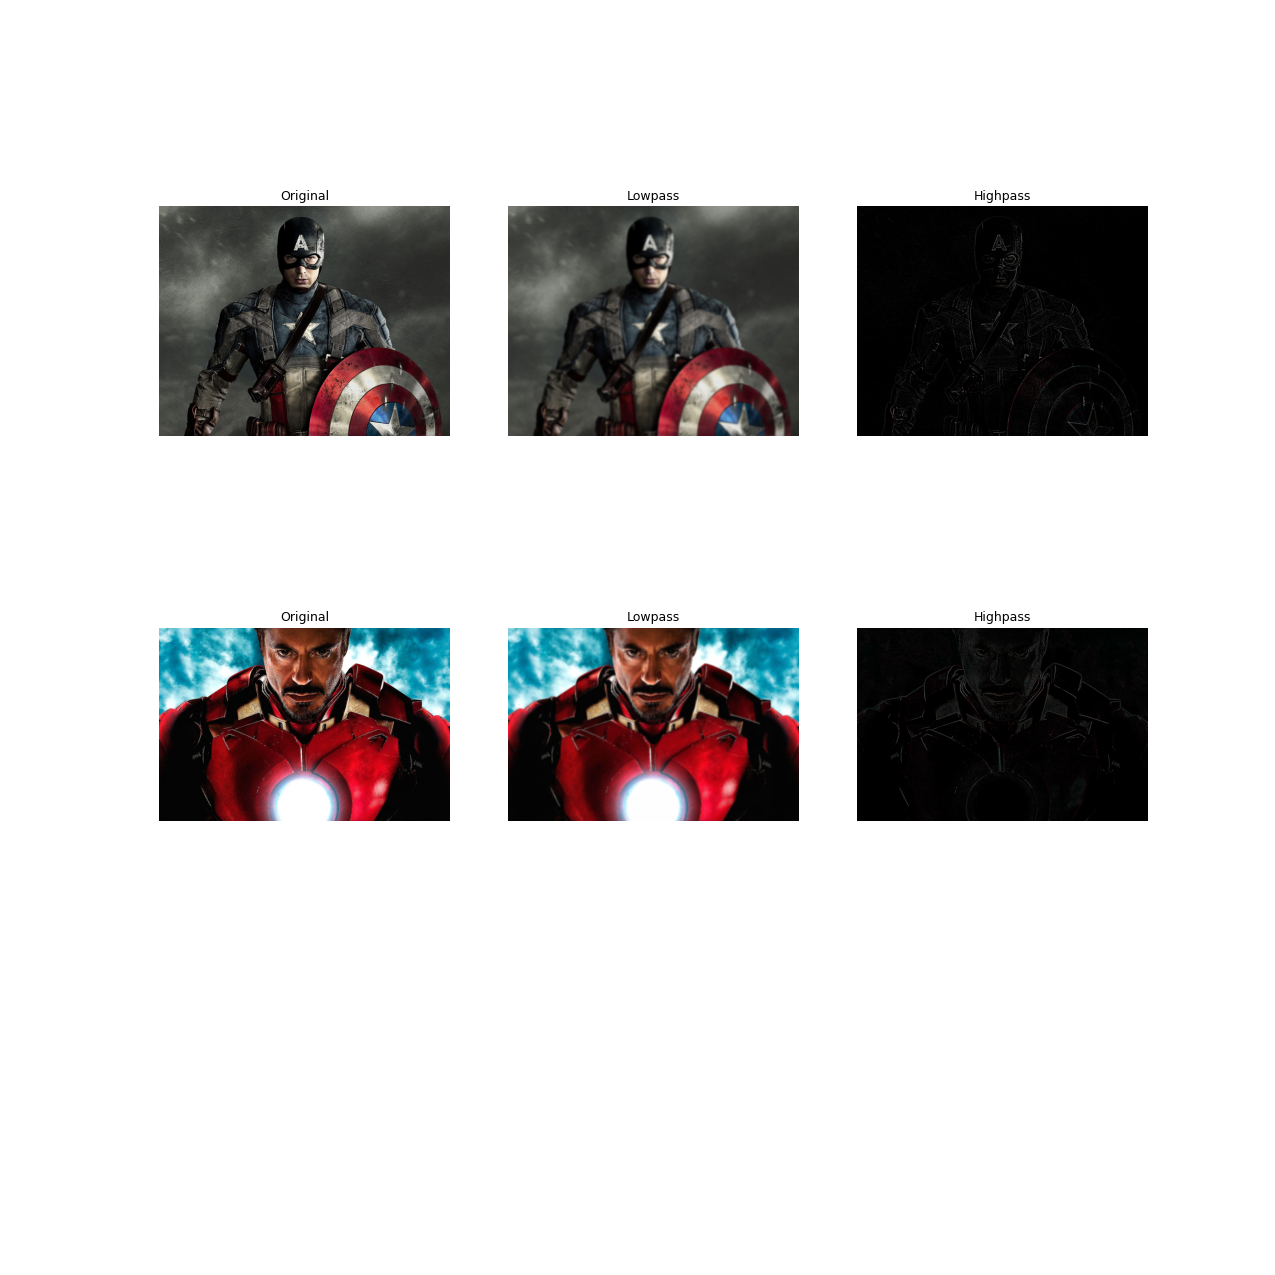

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
#your solution
from skimage import filters

# 1. load images
einstein = io.imread('images_notebook/Capitain_America.jpg')
monroe = io.imread("images_notebook/Ironman.jpg")

# transform values into float
einstein = img_as_float(einstein)
monroe = img_as_float(monroe)

# 2. Apply a low-pass filter to both of them
# with sigma = 2.5 hybrid images give better results
einstein_l = filters.gaussian(einstein, sigma=2) # sigma = 1 by default
monroe_l = filters.gaussian(monroe, sigma=2.5) # sigma = 1 by default

# 3 Apply a high-pass filter to both of them
einstein_h = einstein - einstein_l
monroe_h = monroe - monroe_l

# display results
fig = plt.figure(figsize=(17,17))
plt.subplots_adjust(bottom=0.3)
fig.add_subplot(2,3,1)
plt.axis('off')
plt.title('Original')
plt.imshow(einstein,cmap='gray')
fig.add_subplot(2,3,2)
plt.axis('off')
plt.title('Lowpass')
plt.imshow(einstein_l,cmap='gray')
fig.add_subplot(2,3,3)
plt.axis('off')
plt.title('Highpass')
plt.imshow(einstein_h,cmap='gray')
fig.add_subplot(2,3,4)
plt.axis('off')
plt.title('Original')
plt.imshow(monroe,cmap='gray')
fig.add_subplot(2,3,5)
plt.axis('off')
plt.title('Lowpass')
plt.imshow(monroe_l,cmap='gray')
fig.add_subplot(2,3,6)
plt.axis('off')
plt.title('Highpass')
plt.imshow(monroe_h,cmap='gray')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(575, 728, 3)


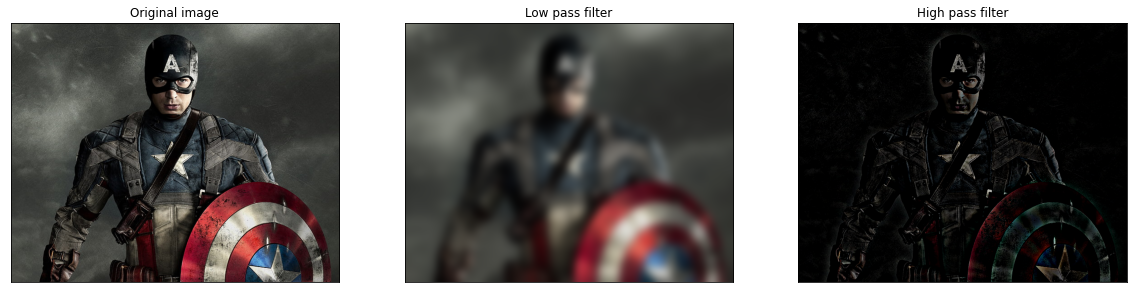

In [ ]:
#your solution



b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


In [ ]:
#your solution
# if we want to focus on Marylin we should use Marylin's lowpass filter and 
# Einstein's highpass filter as lowpass have more data than the higher one
# Highpass einstein + Lowpass monroe
hybrid_marylin = einstein_h + monroe_l
# Highpass monroe + Lowpass einstein
hybrid_einstein = monroe_h + einstein_l


fig = plt.figure(figsize=(17,17))
plt.subplots_adjust(bottom=0.3)
fig.add_subplot(1,4,1)
plt.axis('off')
plt.title('Original Marylin')
plt.imshow(monroe,cmap='gray')
fig.add_subplot(1,4,2)
plt.axis('off')
plt.title("Marylin's hybrid")
plt.imshow(hybrid_marylin,cmap='gray')
fig.add_subplot(1,4,3)
plt.axis('off')
plt.title("Original Einstein")
plt.imshow(einstein,cmap='gray')
fig.add_subplot(1,4,4)
plt.axis('off')
plt.title("Einstein's Hybrid")
plt.imshow(hybrid_einstein,cmap='gray')
plt.show()

# Augmenting rescale
einstein_max = rescale(hybrid_einstein, 4)
marylin_max = rescale(hybrid_marylin, 4)

# Reducing rescale
einstein_mini = rescale(hybrid_einstein, 0.4)
marylin_mini = rescale(hybrid_marylin, 0.4)

fig = plt.figure(figsize=(17,17))
plt.subplots_adjust(bottom=0.3)
fig.add_subplot(1,4,1)
plt.axis('off')
plt.title('Marylin augmented')
plt.imshow(marylin_max,cmap='gray')
fig.add_subplot(1,4,2)
plt.axis('off')
plt.title("Marylin reduced")
plt.imshow(marylin_mini,cmap='gray')
fig.add_subplot(1,4,3)
plt.axis('off')
plt.title("Einstein Augmented")
plt.imshow(einstein_max,cmap='gray')
fig.add_subplot(1,4,4)
plt.axis('off')
plt.title("Einstein reduced")
plt.imshow(einstein_mini,cmap='gray')
plt.show()


ValueError: operands could not be broadcast together with shapes (575,728,3) (1000,1500,3) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


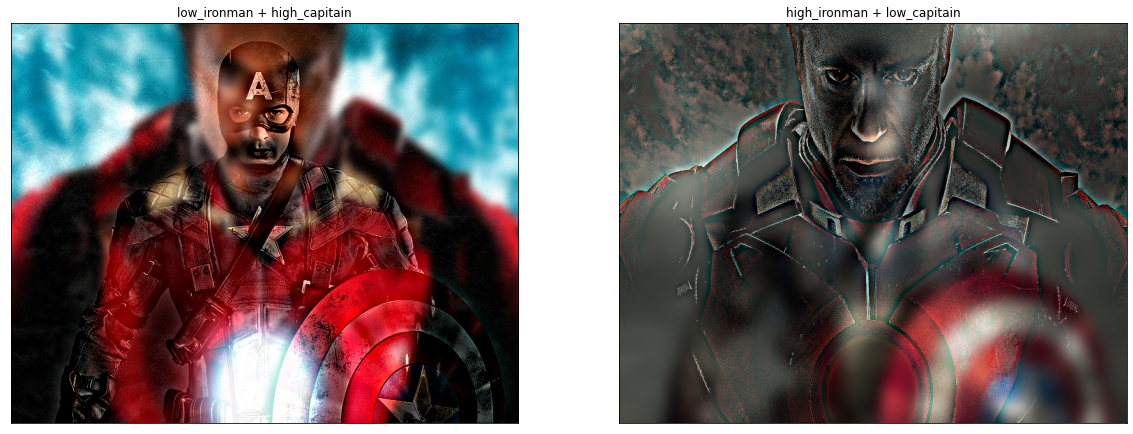

In [ ]:
#your solution


### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


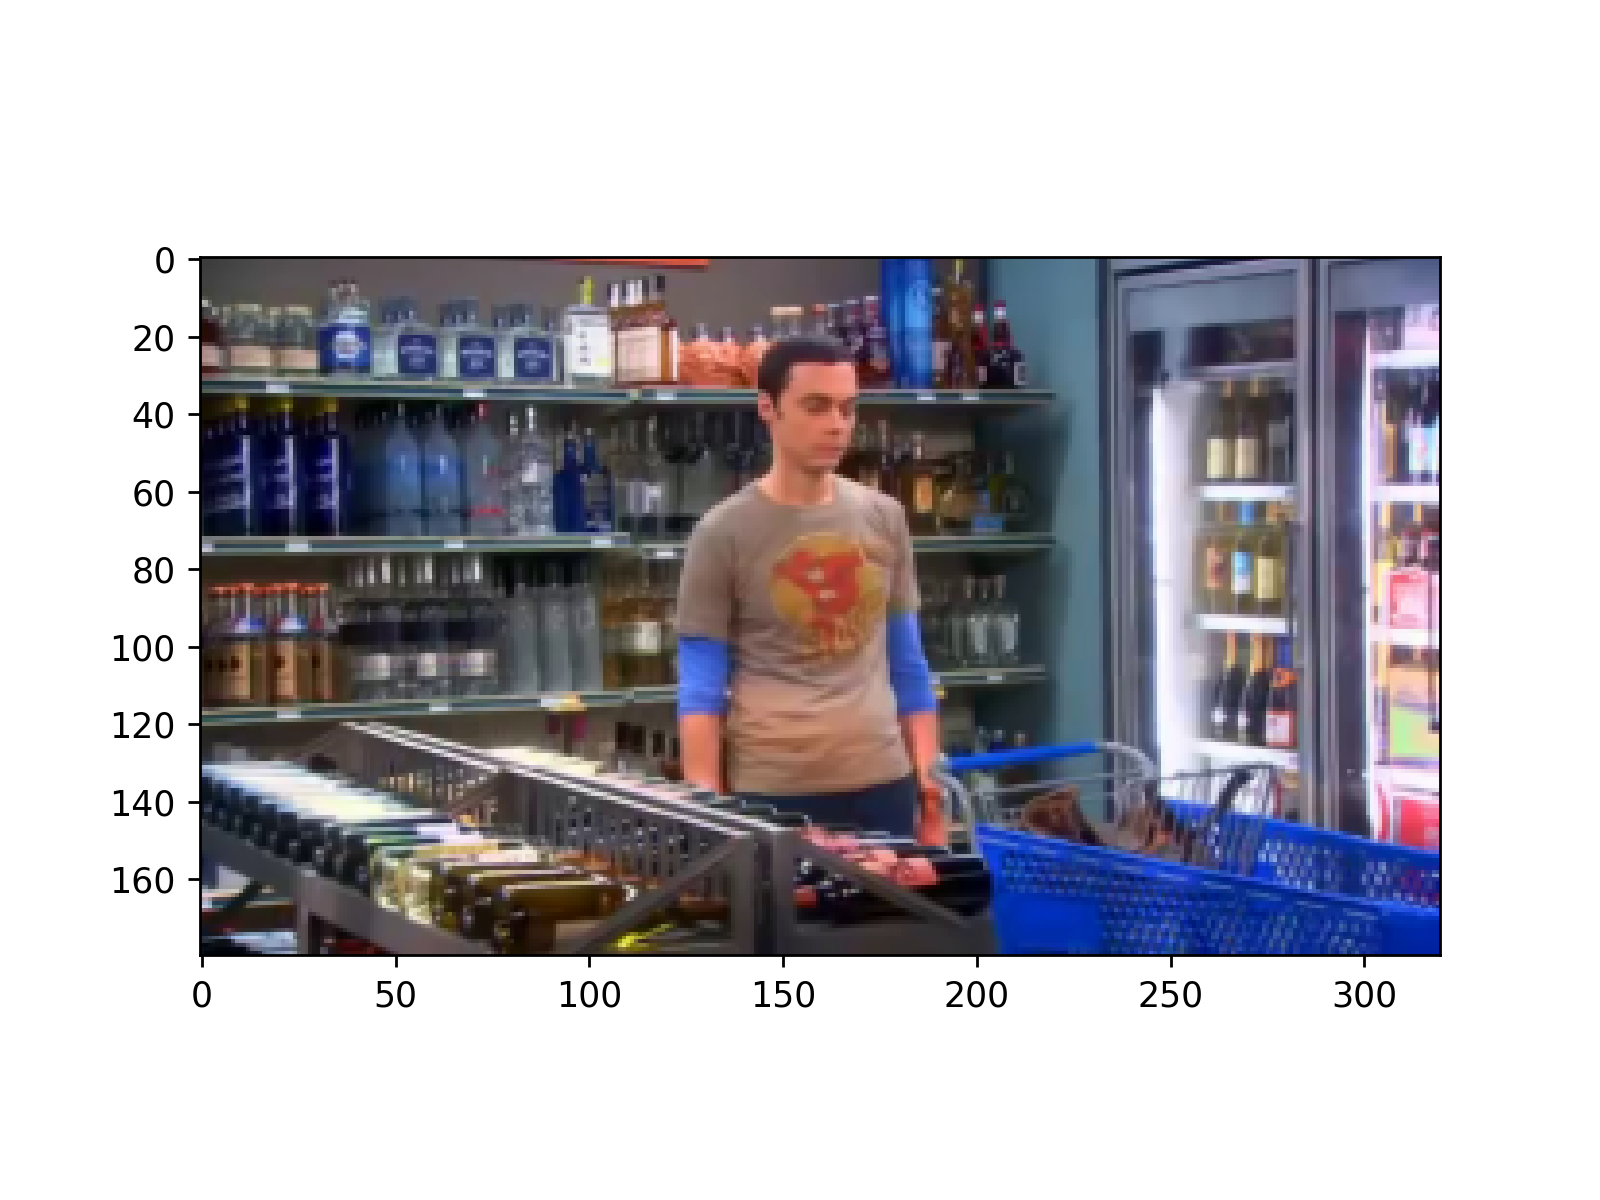

In [ ]:

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


<IPython.core.display.Javascript object>


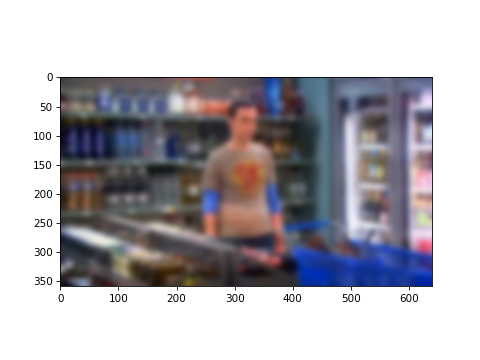

In [ ]:
%matplotlib nbagg 
from matplotlib import pyplot as plt, animation as anim

# We get the images
collection = io.ImageCollection('./images_notebook/bigbangcollection/*.png')
num_frames = len(collection)
 
# We generate the next frame
def frame_update(frame_num) :    
    act_img.set_array(gaussian_each(collection[frame_num], 5))
    return act_img

# We visualize the video using FuncAnimation
fig = plt.figure()
act_img = plt.imshow(collection[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = num_frames, interval = 20, repeat = False)
plt.show()

<IPython.core.display.Javascript object>


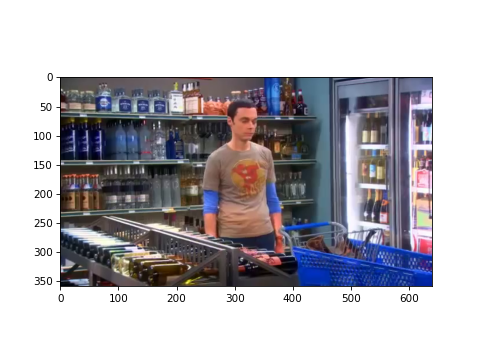

In [ ]:
#your solution
%matplotlib nbagg 
from matplotlib import pyplot as plt, animation as anim
from skimage import io

bigbang_imgs = io.collection.ImageCollection('./images_notebook/bigbangcollection/*.png')
total_film_frames = len(bigbang_imgs)

#generates the next frame
def frame_update(frame_num) :
    act_img.set_array(bigbang_imgs[frame_num])
    return act_img

#visualize the video using FuncAnimation
fig = plt.figure()
act_img = plt.imshow(bigbang_imgs[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_film_frames, interval = 20, repeat = False)
plt.show()

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


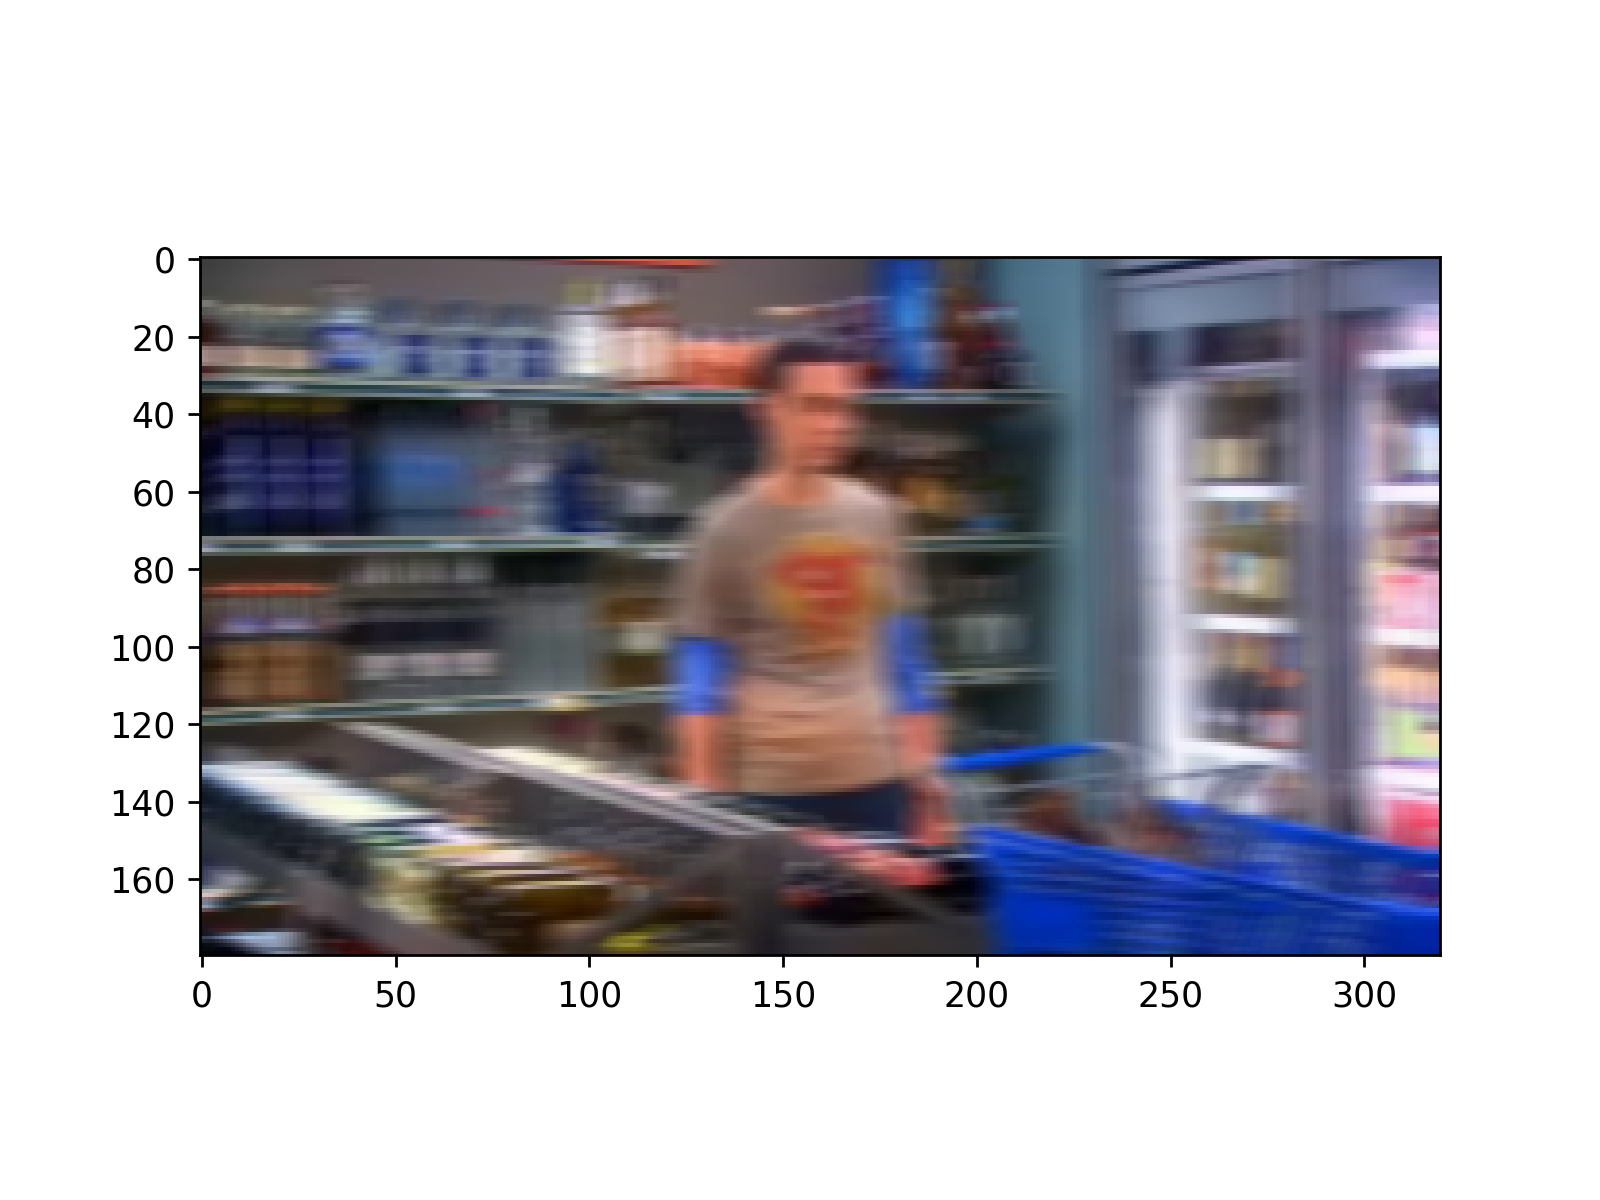

In [ ]:
import warnings
warnings.filterwarnings("ignore")